In [40]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.1.4
NumPy version: 1.26.4


In [42]:
# Create portfolio structure data
portfolio_structure = """Sector,Company,Subsector,Asset_Type
Mining,Kuvimba Mining House,Gold/Platinum/Lithium,Major Asset
Mining,Bindura Nickel Corporation,Nickel,Portfolio Company
Mining,Freda Rebecca Gold Mine,Gold,Portfolio Company
Mining,Great Dyke Investments,Platinum,Portfolio Company
Mining,Jena Mines,Mining Services,Portfolio Company
Mining,Bio Metallurgical Zimbabwe,Processing,Portfolio Company
Mining,Zim Alloys,Chrome,Portfolio Company
Energy,ZESA Holdings,Electricity,Major Asset
Energy,National Oil Infrastructure Company,Oil Storage,Portfolio Company
ICT,NetOne Cellular,Telecommunications,Portfolio Company
ICT,TelOne,Telecommunications,Portfolio Company
ICT,Telecel Zimbabwe,Telecommunications,Portfolio Company
ICT,Econet (partial stake),Telecommunications,Strategic
Transport,National Railways of Zimbabwe,Rail,Portfolio Company
Transport,Air Zimbabwe,Aviation,Portfolio Company
Transport,ZUPCO,Bus Transport,Portfolio Company
Agriculture,Silo Investments,Food Processing,Portfolio Company
Agriculture,Allied Timbers,Forestry,Portfolio Company
Financials,ZIMRE Holdings,Insurance,Portfolio Company
Financials,CBZ Holdings,Banking,Portfolio Company
Real Estate,Various properties,Property,Portfolio
Manufacturing,Chemplex Corporation,Chemicals,Portfolio Company
Manufacturing,Willowvale Motor Industry,Automotive,Portfolio Company"""

# Save to file
with open('mif_portfolio_structure.csv', 'w') as f:
    f.write(portfolio_structure)

# Load and display
structure_df = pd.read_csv('mif_portfolio_structure.csv')
print("✓ Portfolio structure file created!")
print(f"\nTotal companies: {len(structure_df)}")
print(f"\nCompanies by sector:")
print(structure_df['Sector'].value_counts())
print("\nSample data:")
structure_df.head(10)

✓ Portfolio structure file created!

Total companies: 23

Companies by sector:
Sector
Mining           7
ICT              4
Transport        3
Energy           2
Agriculture      2
Financials       2
Manufacturing    2
Real Estate      1
Name: count, dtype: int64

Sample data:


,Sector,Company,Subsector,Asset_Type
0,Mining,Kuvimba Mining House,Gold/Platinum/Lithium,Major Asset
1,Mining,Bindura Nickel Corporation,Nickel,Portfolio Company
2,Mining,Freda Rebecca Gold Mine,Gold,Portfolio Company
3,Mining,Great Dyke Investments,Platinum,Portfolio Company
4,Mining,Jena Mines,Mining Services,Portfolio Company
5,Mining,Bio Metallurgical Zimbabwe,Processing,Portfolio Company
6,Mining,Zim Alloys,Chrome,Portfolio Company
7,Energy,ZESA Holdings,Electricity,Major Asset
8,Energy,National Oil Infrastructure Company,Oil Storage,Portfolio Company
9,ICT,NetOne Cellular,Telecommunications,Portfolio Company


In [44]:
# Set random seed for reproducibility
np.random.seed(42)

# Define sectors and their characteristics
sectors = {
    'Mining': {'companies': 7, 'volatility': 0.25, 'base_return': 0.12},
    'Energy': {'companies': 2, 'volatility': 0.20, 'base_return': 0.08},
    'ICT': {'companies': 4, 'volatility': 0.22, 'base_return': 0.15},
    'Transport': {'companies': 3, 'volatility': 0.18, 'base_return': 0.06},
    'Agriculture': {'companies': 2, 'volatility': 0.28, 'base_return': 0.10},
    'Financials': {'companies': 2, 'volatility': 0.16, 'base_return': 0.09},
    'Real Estate': {'companies': 1, 'volatility': 0.12, 'base_return': 0.07},
    'Manufacturing': {'companies': 2, 'volatility': 0.19, 'base_return': 0.08}
}

# Generate monthly data for 5 years
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
dates = pd.date_range(start_date, end_date, freq='M')

print("Generating MIF portfolio data...")
print(f"Date range: {start_date.date()} to {end_date.date()}")
print(f"Total months: {len(dates)}")

# Create portfolio data
data = []

for date in dates:
    for sector, info in sectors.items():
        for company_num in range(info['companies']):
            # Simulate monthly return with sector characteristics
            base_return = info['base_return'] / 12  # Monthly from annual
            volatility = info['volatility'] / np.sqrt(12)  # Monthly volatility
            
            # Add some autocorrelation and market correlation
            market_factor = np.random.normal(0, 0.02)
            company_specific = np.random.normal(0, volatility)
            monthly_return = base_return + market_factor + company_specific
            
            data.append({
                'Date': date,
                'Sector': sector,
                'Company': f'{sector}_Company_{company_num+1}',
                'Monthly_Return': monthly_return,
                'Asset_Value': np.random.uniform(50, 500) * 1e6  # Millions USD
            })

portfolio_df = pd.DataFrame(data)
portfolio_df.to_csv('mif_portfolio_returns.csv', index=False)

print("\n" + "="*60)
print("✓ Portfolio data generated successfully!")
print("="*60)
print(f"\nFile created: mif_portfolio_returns.csv")
print(f"Total records: {len(portfolio_df):,}")
print(f"Sectors: {portfolio_df['Sector'].nunique()}")
print(f"Companies: {portfolio_df['Company'].nunique()}")
print(f"Date range: {portfolio_df['Date'].min().date()} to {portfolio_df['Date'].max().date()}")

print("\nSector summary:")
print(portfolio_df.groupby('Sector')['Company'].nunique())

Generating MIF portfolio data...
Date range: 2020-01-01 to 2024-12-31
Total months: 60

✓ Portfolio data generated successfully!

File created: mif_portfolio_returns.csv
Total records: 1,380
Sectors: 8
Companies: 23
Date range: 2020-01-31 to 2024-12-31

Sector summary:
Sector
Agriculture      2
Energy           2
Financials       2
ICT              4
Manufacturing    2
Mining           7
Real Estate      1
Transport        3
Name: Company, dtype: int64


In [46]:
# Display sample data
print("Sample portfolio returns:")
portfolio_df.head(15)

Sample portfolio returns:


,Date,Sector,Company,Monthly_Return,Asset_Value
0,2020-01-31,Mining,Mining_Company_1,0.009956,3.793973e+08
1,2020-01-31,Mining,Mining_Company_2,0.010777,1.201975e+08
2,2020-01-31,Mining,Mining_Company_3,0.096969,5.926302e+07
3,2020-01-31,Mining,Mining_Company_4,-0.039518,1.325320e+08
4,2020-01-31,Mining,Mining_Company_5,-0.123240,2.443753e+08
5,2020-01-31,Mining,Mining_Company_6,-0.083647,1.127722e+08
6,2020-01-31,Mining,Mining_Company_7,-0.110085,2.552315e+08
7,2020-01-31,Energy,Energy_Company_1,0.028587,2.814055e+08
8,2020-01-31,Energy,Energy_Company_2,0.002183,3.233952e+08
9,2020-01-31,ICT,ICT_Company_1,0.060665,9.395245e+07


In [48]:
# Calculate portfolio statistics
print("PORTFOLIO STATISTICS")
print("="*60)

# By sector
sector_stats = portfolio_df.groupby('Sector').agg({
    'Monthly_Return': ['mean', 'std'],
    'Asset_Value': 'sum',
    'Company': 'nunique'
})

sector_stats.columns = ['Avg_Monthly_Return', 'Volatility', 'Total_Value', 'Num_Companies']
sector_stats['Annualized_Return'] = (1 + sector_stats['Avg_Monthly_Return']) ** 12 - 1
sector_stats['Total_Value_Billions'] = sector_stats['Total_Value'] / 1e9

print(sector_stats.round(4))

# Overall portfolio
total_value = portfolio_df['Asset_Value'].sum()
print(f"\nTotal Portfolio Value: ${total_value/1e9:.2f} billion")

PORTFOLIO STATISTICS
               Avg_Monthly_Return  Volatility   Total_Value  Num_Companies  \
Sector                                                                       
Agriculture                0.0193      0.0818  3.349570e+10              2   
Energy                     0.0142      0.0564  3.325537e+10              2   
Financials                 0.0070      0.0532  3.262405e+10              2   
ICT                        0.0124      0.0689  6.320293e+10              4   
Manufacturing              0.0115      0.0554  3.477953e+10              2   
Mining                     0.0115      0.0734  1.133062e+11              7   
Real Estate                0.0080      0.0404  1.672360e+10              1   
Transport                 -0.0020      0.0575  4.858852e+10              3   

               Annualized_Return  Total_Value_Billions  
Sector                                                  
Agriculture               0.2573               33.4957  
Energy                    0

In [50]:
print("Generating Zimbabwe Stock Exchange benchmark data...")

dates = pd.date_range('2020-01-01', '2024-12-31', freq='M')

# Simulate ZSE All Share Index with realistic characteristics
zse_values = []
current_value = 100  # Starting index value

for date in dates:
    # Add realistic volatility and growth patterns
    monthly_change = np.random.normal(0.005, 0.08)  # 0.5% mean, 8% volatility
    current_value = current_value * (1 + monthly_change)
    zse_values.append({
        'Date': date,
        'ZSE_AllShare': current_value,
        'Monthly_Return': monthly_change
    })

zse_df = pd.DataFrame(zse_values)
zse_df.to_csv('zse_benchmark_data.csv', index=False)

print("\n" + "="*60)
print("✓ ZSE benchmark data created successfully!")
print("="*60)
print(f"\nFile created: zse_benchmark_data.csv")
print(f"Total records: {len(zse_df):,}")
print(f"Date range: {zse_df['Date'].min()} to {zse_df['Date'].max()}")
print(f"\nIndex statistics:")
print(f"Starting value: {zse_df['ZSE_AllShare'].iloc[0]:.2f}")
print(f"Ending value: {zse_df['ZSE_AllShare'].iloc[-1]:.2f}")
print(f"Total return: {(zse_df['ZSE_AllShare'].iloc[-1]/zse_df['ZSE_AllShare'].iloc[0] - 1)*100:.2f}%")
print(f"Average monthly return: {zse_df['Monthly_Return'].mean()*100:.2f}%")
print(f"Monthly volatility: {zse_df['Monthly_Return'].std()*100:.2f}%")

print("\nSample data:")
zse_df.head(10)

Generating Zimbabwe Stock Exchange benchmark data...

✓ ZSE benchmark data created successfully!

File created: zse_benchmark_data.csv
Total records: 60
Date range: 2020-01-31 00:00:00 to 2024-12-31 00:00:00

Index statistics:
Starting value: 91.09
Ending value: 58.14
Total return: -36.17%
Average monthly return: -0.65%
Monthly volatility: 7.13%

Sample data:


,Date,ZSE_AllShare,Monthly_Return
0,2020-01-31,91.090613,-0.089094
1,2020-02-29,95.099040,0.044005
2,2020-03-31,104.566272,0.099551
3,2020-04-30,109.112044,0.043473
4,2020-05-31,107.889778,-0.011202
5,2020-06-30,103.869399,-0.037264
6,2020-07-31,112.998170,0.087887
7,2020-08-31,100.699676,-0.108838
8,2020-09-30,93.387878,-0.072610
9,2020-10-31,90.884651,-0.026805


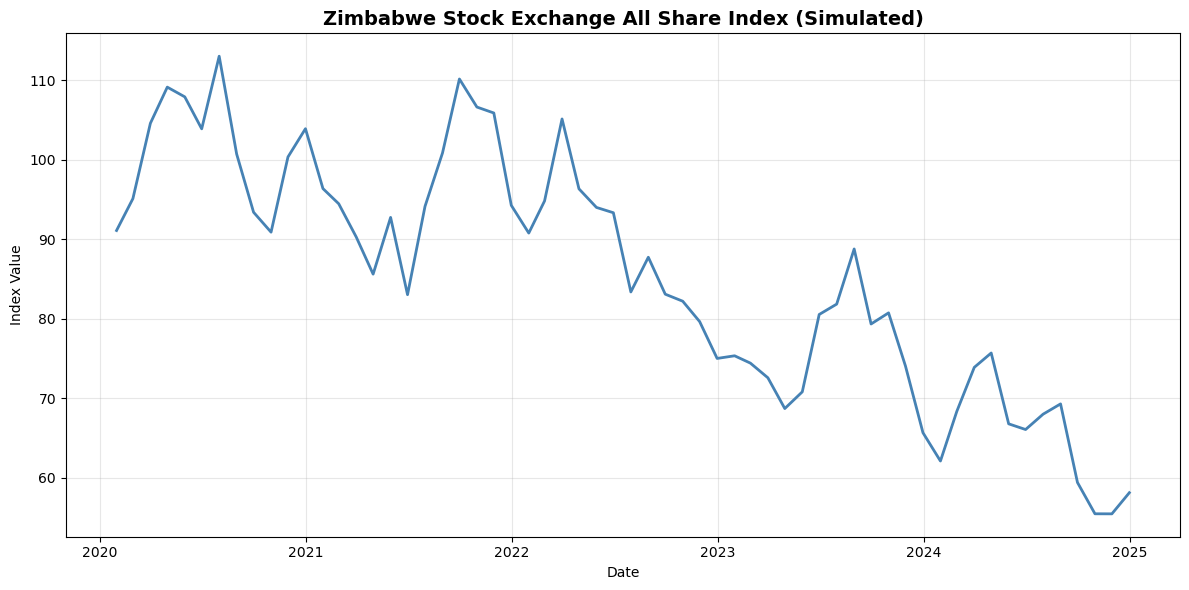

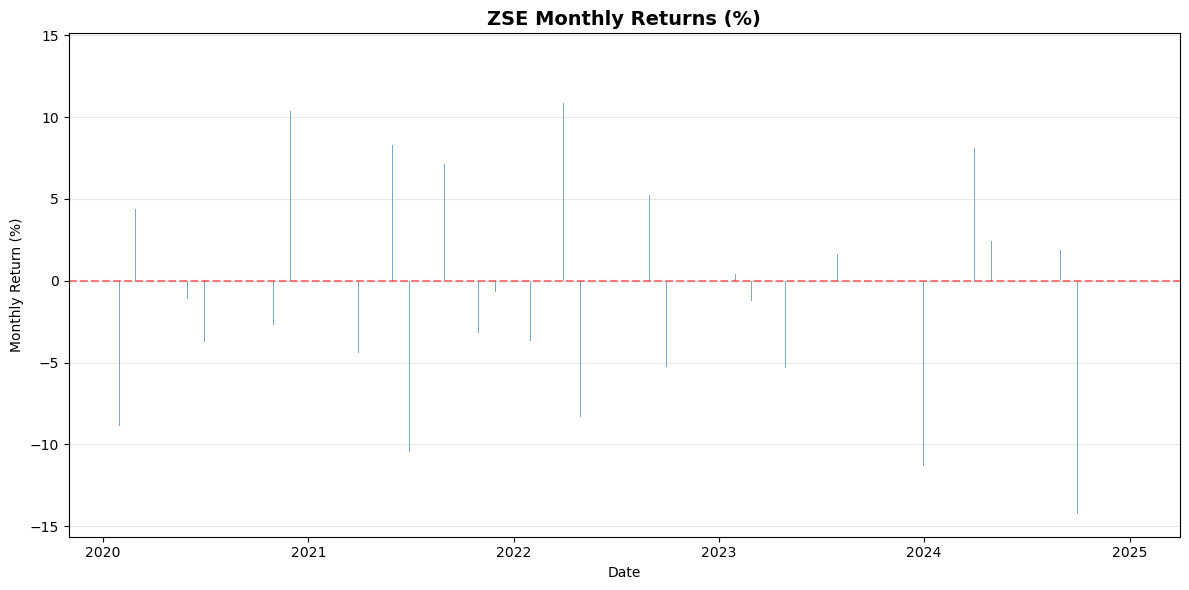

In [52]:
import matplotlib.pyplot as plt

# Plot ZSE index over time
plt.figure(figsize=(12, 6))
plt.plot(zse_df['Date'], zse_df['ZSE_AllShare'], linewidth=2, color='steelblue')
plt.title('Zimbabwe Stock Exchange All Share Index (Simulated)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot monthly returns
plt.figure(figsize=(12, 6))
plt.bar(zse_df['Date'], zse_df['Monthly_Return']*100, color='steelblue', alpha=0.7)
plt.title('ZSE Monthly Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Monthly Return (%)')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [54]:
print("Generating commodity price data for MIF's key mining assets...")

dates = pd.date_range('2020-01-01', '2024-12-31', freq='M')

# Base prices (USD per unit)
commodities = {
    'Gold': {'start': 1500, 'volatility': 0.03, 'trend': 0.001},
    'Platinum': {'start': 900, 'volatility': 0.05, 'trend': -0.0005},
    'Lithium': {'start': 10000, 'volatility': 0.12, 'trend': 0.008},  # per ton
    'Nickel': {'start': 14000, 'volatility': 0.07, 'trend': 0.002},
    'Chrome': {'start': 300, 'volatility': 0.06, 'trend': 0.0015}
}

data = []
months_count = len(dates)

for date_idx, date in enumerate(dates):
    for commodity, params in commodities.items():
        # Calculate price with trend and volatility
        price = params['start']
        for _ in range(date_idx):
            price = price * (1 + params['trend'] + np.random.normal(0, params['volatility']))
        
        data.append({
            'Date': date,
            'Commodity': commodity,
            'Price': max(price, params['start'] * 0.5),  # Prevent negative prices
            'Unit': 'troy_oz' if commodity in ['Gold', 'Platinum'] else 'ton'
        })

commodity_df = pd.DataFrame(data)
commodity_df.to_csv('commodity_prices.csv', index=False)

print("\n" + "="*60)
print("✓ Commodity price data created successfully!")
print("="*60)
print(f"\nFile created: commodity_prices.csv")
print(f"Total records: {len(commodity_df):,}")
print(f"Commodities tracked: {commodity_df['Commodity'].nunique()}")
print(f"Date range: {commodity_df['Date'].min()} to {commodity_df['Date'].max()}")

print("\nPrice changes over period:")
for commodity in commodities.keys():
    comm_data = commodity_df[commodity_df['Commodity'] == commodity]
    start_price = comm_data['Price'].iloc[0]
    end_price = comm_data['Price'].iloc[-1]
    change = (end_price / start_price - 1) * 100
    print(f"  {commodity}: ${start_price:.2f} → ${end_price:.2f} ({change:+.1f}%)")

print("\nSample data:")
commodity_df.head(15)

Generating commodity price data for MIF's key mining assets...

✓ Commodity price data created successfully!

File created: commodity_prices.csv
Total records: 300
Commodities tracked: 5
Date range: 2020-01-31 00:00:00 to 2024-12-31 00:00:00

Price changes over period:
  Gold: $1500.00 → $1449.97 (-3.3%)
  Platinum: $900.00 → $536.04 (-40.4%)
  Lithium: $10000.00 → $14823.84 (+48.2%)
  Nickel: $14000.00 → $17312.38 (+23.7%)
  Chrome: $300.00 → $328.42 (+9.5%)

Sample data:


,Date,Commodity,Price,Unit
0,2020-01-31,Gold,1500.000000,troy_oz
1,2020-01-31,Platinum,900.000000,troy_oz
2,2020-01-31,Lithium,10000.000000,ton
3,2020-01-31,Nickel,14000.000000,ton
4,2020-01-31,Chrome,300.000000,ton
5,2020-02-29,Gold,1402.674248,troy_oz
6,2020-02-29,Platinum,892.254421,troy_oz
7,2020-02-29,Lithium,10251.658524,ton
8,2020-02-29,Nickel,14860.619749,ton
9,2020-02-29,Chrome,312.921437,ton


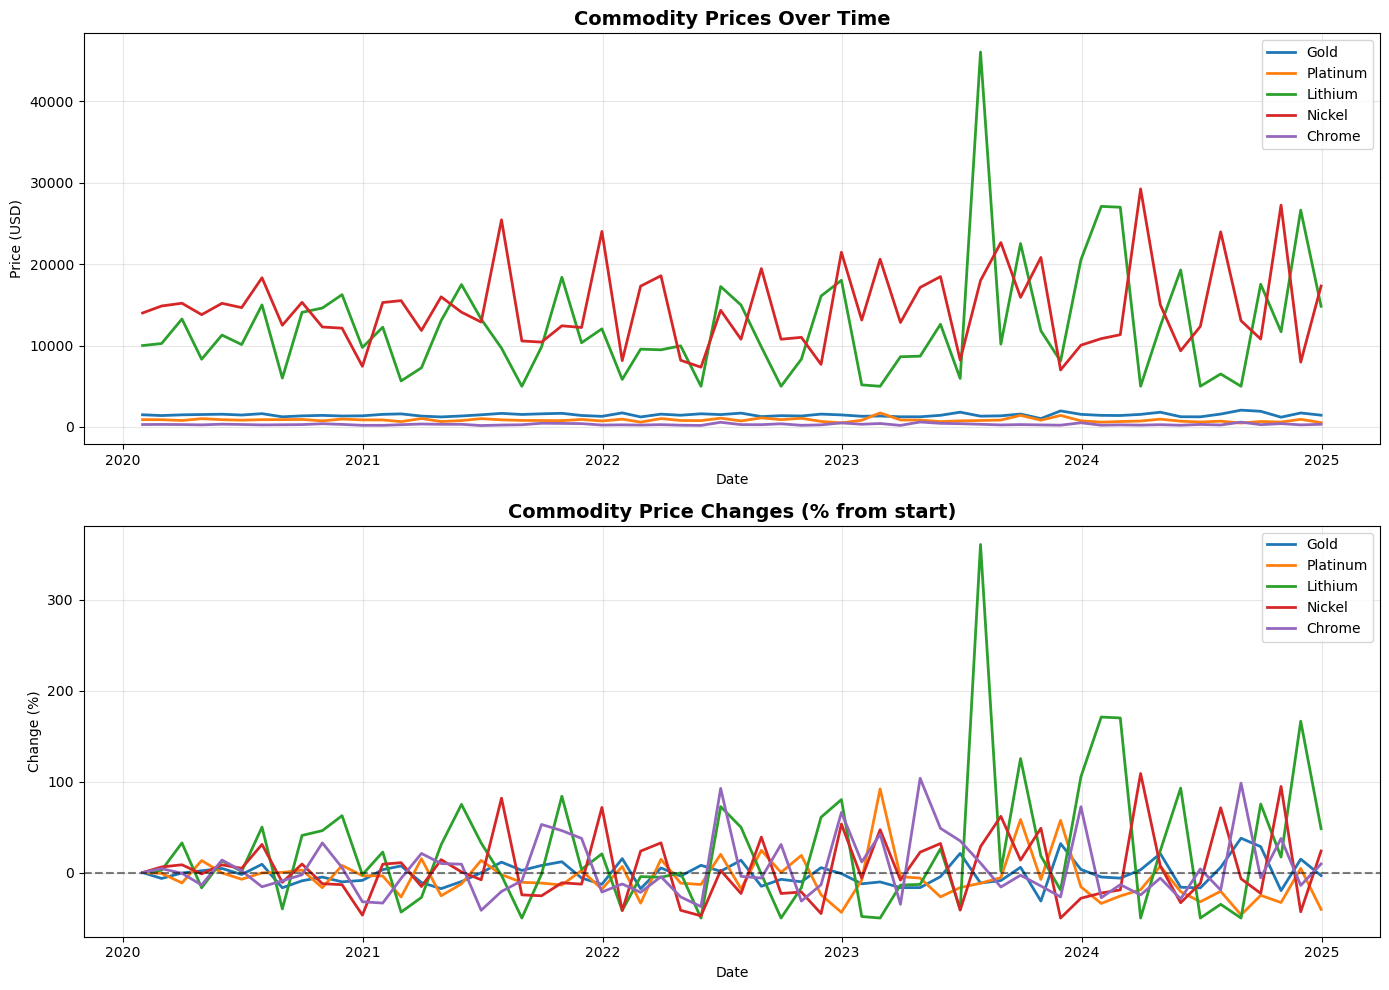

In [56]:
# Plot commodity prices
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: All commodities
for commodity in commodities.keys():
    comm_data = commodity_df[commodity_df['Commodity'] == commodity]
    axes[0].plot(comm_data['Date'], comm_data['Price'], label=commodity, linewidth=2)

axes[0].set_title('Commodity Prices Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Normalized to show % change
for commodity in commodities.keys():
    comm_data = commodity_df[commodity_df['Commodity'] == commodity].copy()
    comm_data['Normalized'] = (comm_data['Price'] / comm_data['Price'].iloc[0] - 1) * 100
    axes[1].plot(comm_data['Date'], comm_data['Normalized'], label=commodity, linewidth=2)

axes[1].set_title('Commodity Price Changes (% from start)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Change (%)')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [58]:
import os

print("VERIFICATION - Files Created:")
print("="*60)

files_to_check = [
    'mif_portfolio_structure.csv',
    'mif_portfolio_returns.csv',
    'zse_benchmark_data.csv',
    'commodity_prices.csv'
]

for file in files_to_check:
    if os.path.exists(file):
        size = os.path.getsize(file) / 1024  # KB
        print(f"✓ {file} ({size:.1f} KB)")
    else:
        print(f"✗ {file} - NOT FOUND")

        
print("\n" + "="*60)
print("✓ Step 1.2 Complete!")
print("="*60)

VERIFICATION - Files Created:
✓ mif_portfolio_structure.csv (1.3 KB)
✓ mif_portfolio_returns.csv (105.3 KB)
✓ zse_benchmark_data.csv (3.0 KB)
✓ commodity_prices.csv (12.5 KB)

✓ Step 1.2 Complete!


In [26]:
from sqlalchemy import create_engine, Column, Integer, Float, String, Date
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import pandas as pd

# Create SQLite database
engine = create_engine('sqlite:///mif_performance.db')
Base = declarative_base()

# Define tables
class PortfolioReturn(Base):
    __tablename__ = 'portfolio_returns'
    id = Column(Integer, primary_key=True)
    date = Column(Date)
    sector = Column(String)
    company = Column(String)
    monthly_return = Column(Float)
    asset_value = Column(Float)

class BenchmarkReturn(Base):
    __tablename__ = 'benchmark_returns'
    id = Column(Integer, primary_key=True)
    date = Column(Date)
    index_name = Column(String)
    index_value = Column(Float)
    monthly_return = Column(Float)

class CommodityPrice(Base):
    __tablename__ = 'commodity_prices'
    id = Column(Integer, primary_key=True)
    date = Column(Date)
    commodity = Column(String)
    price = Column(Float)
    unit = Column(String)

# Create tables
Base.metadata.create_all(engine)

# Load data into database
portfolio_df = pd.read_csv('mif_portfolio_returns.csv')
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date'])
portfolio_df.to_sql('portfolio_returns', engine, if_exists='replace', index=False)

zse_df = pd.read_csv('zse_benchmark_data.csv')
zse_df['Date'] = pd.to_datetime(zse_df['Date'])
zse_df.to_sql('benchmark_returns', engine, if_exists='replace', index=False)

commodity_df = pd.read_csv('commodity_prices.csv')
commodity_df['Date'] = pd.to_datetime(commodity_df['Date'])
commodity_df.to_sql('commodity_prices', engine, if_exists='replace', index=False)

print("Database setup complete!")

C:\Users\ABCD\AppData\Local\Temp\ipykernel_5684\3977172135.py:8: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


Database setup complete!
